# Data exploration (Visitor arrivals Dataset)

In [1]:
import pandas as pd
from pathlib import Path

## I94 Visitor Arrivals

This data comes from the US National Tourism and Trade Office. Provides a count of visitor arrivals to the United States (1-night or more) to calculate U.S. travel and tourism volume exports.

Origin: https://travel.trade.gov/research/reports/i94/historical/2016.html

Fields descriptions: data/I94_SAS_Labels_Descriptions.SAS

## Data info

In [2]:
df = pd.read_csv("../data/visitor_arrivals_sample.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   cicid       1000 non-null   float64
 2   i94yr       1000 non-null   float64
 3   i94mon      1000 non-null   float64
 4   i94cit      1000 non-null   float64
 5   i94res      1000 non-null   float64
 6   i94port     1000 non-null   object 
 7   arrdate     1000 non-null   float64
 8   i94mode     1000 non-null   float64
 9   i94addr     941 non-null    object 
 10  depdate     951 non-null    float64
 11  i94bir      1000 non-null   float64
 12  i94visa     1000 non-null   float64
 13  count       1000 non-null   float64
 14  dtadfile    1000 non-null   int64  
 15  visapost    382 non-null    object 
 16  occup       4 non-null      object 
 17  entdepa     1000 non-null   object 
 18  entdepd     954 non-null    object 
 19  entdepu     0 non-null      

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,Unnamed: 0,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,i94bir,i94visa,count,dtadfile,visapost,occup,entdepa,entdepd,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,2027561,4084316.0,2016.0,4.0,209.0,209.0,HHW,20566.0,1.0,HI,20573.0,61.0,2.0,1.0,20160422,NaN,NaN,G,O,NaN,M,1955.0,07202016,F,NaN,JL,5.658267e+10,00782,WT
1,2171295,4422636.0,2016.0,4.0,582.0,582.0,MCA,20567.0,1.0,TX,20568.0,26.0,2.0,1.0,20160423,MTR,NaN,G,R,NaN,M,1990.0,10222016,M,NaN,*GA,9.436200e+10,XBLNG,B2
2,589494,1195600.0,2016.0,4.0,148.0,112.0,OGG,20551.0,1.0,FL,20571.0,76.0,2.0,1.0,20160407,NaN,NaN,G,O,NaN,M,1940.0,07052016,M,NaN,LH,5.578047e+10,00464,WT
3,2631158,5291768.0,2016.0,4.0,297.0,297.0,LOS,20572.0,1.0,CA,20581.0,25.0,2.0,1.0,20160428,DOH,NaN,G,O,NaN,M,1991.0,10272016,M,NaN,QR,9.478970e+10,00739,B2
4,3032257,985523.0,2016.0,4.0,111.0,111.0,CHM,20550.0,3.0,NY,20553.0,19.0,2.0,1.0,20160406,NaN,NaN,Z,K,NaN,M,1997.0,07042016,F,NaN,NaN,4.232257e+10,LAND,WT


## Data volume

In [4]:
acc = 0
for filepath in Path("../data/visitor_arrivals/").glob('*.parquet'):
    p = pd.read_parquet(filepath)
    #print(f"{p.shape[0]:,}")
    acc += p.shape[0]
    
print(f"{acc:,} rows")

3,096,313 rows


In [5]:
#df = pd.DataFrame()
#for filepath in Path("data/visitor_arrivals/").glob('*.parquet'):
#    df = df.append(pd.read_parquet(filepath))
    
#df.info()

## Date range

In [6]:
dates_df = pd.DataFrame(columns=['arrdate'])
for filepath in Path("../data/visitor_arrivals/").glob('*.parquet'):
    p = pd.read_parquet(filepath, columns=['arrdate'])
    dates_df = dates_df.append(p)
    
dates_df['date'] = pd.to_timedelta(dates_df['arrdate'], unit='D') + pd.Timestamp('1960-1-1')
dates_df[['date']].describe()

,date
count,3096313
unique,30
top,2016-04-29 00:00:00
freq,128267
first,2016-04-01 00:00:00
last,2016-04-30 00:00:00


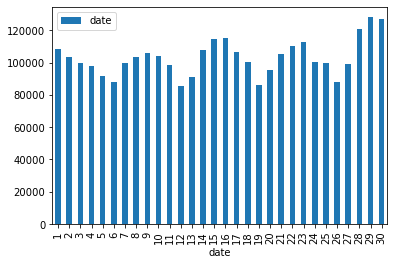

In [7]:
dates_df[['date']].groupby(dates_df['date'].dt.day).count().plot(kind="bar")

As it is observable from the previous dataframe description and the histogram. The data we are dealing with corresponds to the month of April of 2016, with no temporal gaps in the data.

## Different ports

In [8]:
ports_df = pd.DataFrame(columns=['i94port', 'i94mode'])
for filepath in Path("../data/visitor_arrivals/").glob('*.parquet'):
    p = pd.read_parquet(filepath, columns=['i94port', 'i94mode'])
    ports_df = ports_df.append(p)

ports_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096313 entries, 0 to 235124
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   i94port  object 
 1   i94mode  float64
dtypes: float64(1), object(1)
memory usage: 59.1+ MB


In [9]:
ports_df[['i94port']].describe()

,i94port
count,3096313
unique,299
top,NYC
freq,485916


In [10]:
ports_df.groupby(['i94mode']).count()

,i94port
i94mode,
1.0,2994505
2.0,26349
3.0,66660
9.0,8560


## Conclusion

* With the help of the mappings, it is possible to interpret most data related to ports (i94port), although, some of them are missing. To fill the gaps of the missing ports, and to enrich the data, the airport codes dataset will be used.

* The destination state data, where the visitors will reside while in the US, will be enriched using the US cities demographic data, aggregating it state granularity.

* The origin country of the visitors data, will be enriched using the World happiness dataset.